In [9]:
import pandas as pd
import numpy as np
from pandas import DataFrame

In [10]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv")

In [11]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [12]:
type(df)

pandas.core.frame.DataFrame

In [13]:
pd.Series.astype
df['sex'] = pd.to_numeric(df.sex, errors = 'coerce')
df['discipline'] = pd.to_numeric(df.discipline, errors = 'coerce')

In [14]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,NaN,19,18,NaN,139750
1,Prof,NaN,20,16,NaN,173200
2,AsstProf,NaN,4,3,NaN,79750
3,Prof,NaN,45,39,NaN,115000
4,Prof,NaN,40,41,NaN,141500
...,...,...,...,...,...,...
392,Prof,NaN,33,30,NaN,103106
393,Prof,NaN,31,19,NaN,150564
394,Prof,NaN,42,25,NaN,101738
395,Prof,NaN,25,15,NaN,95329


In [9]:
df.isnull()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
392,False,False,False,False,False,False
393,False,False,False,False,False,False
394,False,False,False,False,False,False
395,False,False,False,False,False,False


In [10]:
df.isnull().sum().sum()

0

Descriptive Analysis
Null values values
Visualization - univariate(boxplot, density(histogram, kde)), bivariate(sctter plot), multivariate(pairplot, heatmaps)
Heirarchial visualization
correlations/causations
skewness, kurtosis, moments, momentum

EDA
Independent feature => normal distribution ==> remove skewness ==> transformation
outliers ==> zscore/iqr proximity rule
dataset => in same scale ===> Normalization, Standardization
column(mean) = 0 ==> column is centered
std dev = 1

In [18]:
import seaborn as sns

In [ ]:
# sns.scatterplot()

<AxesSubplot:xlabel='rank', ylabel='salary'>

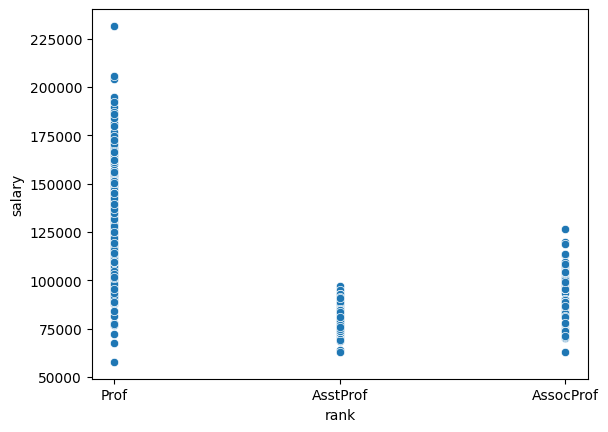

In [19]:
sns.scatterplot(x = "rank", y = "salary", data = df)

We can see salary is equally distributed in the range of 70000 to 100000

<AxesSubplot:xlabel='salary'>

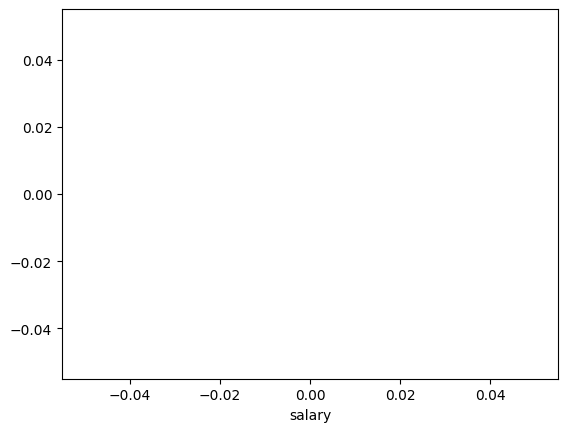

In [20]:
sns.scatterplot(x ="salary", y = "discipline", data = df)

We can see salary is equally distributed for the discipline in the range of 70000 to 155000

<AxesSubplot:ylabel='salary'>

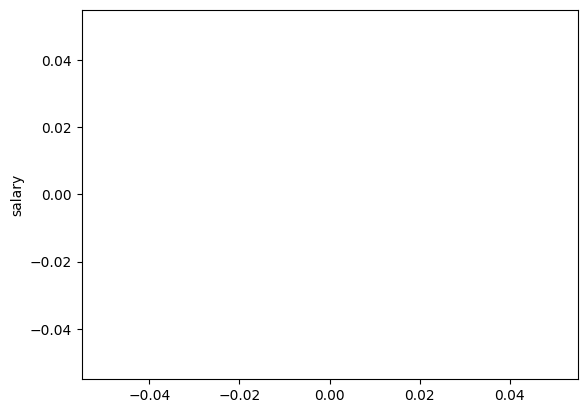

In [21]:
sns.scatterplot(x = "sex", y = "salary", data = df)

We can see salary is equally distributed in the range of 70000 to 155000 for the sex category

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

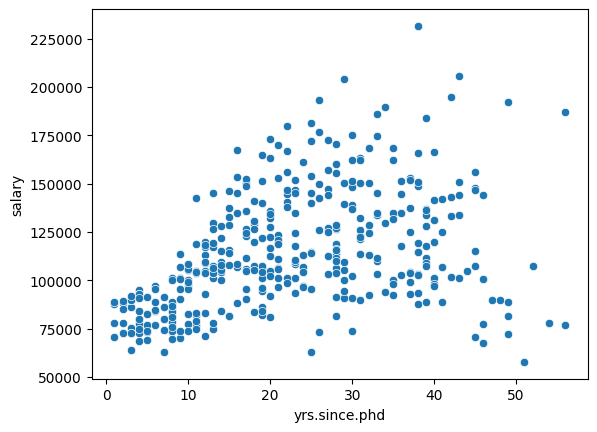

In [22]:
sns.scatterplot(x = "yrs.since.phd", y = "salary", data = df)


There is a positive and negative correlation, as yrs increases the salary increases between 3-8 yrs.

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

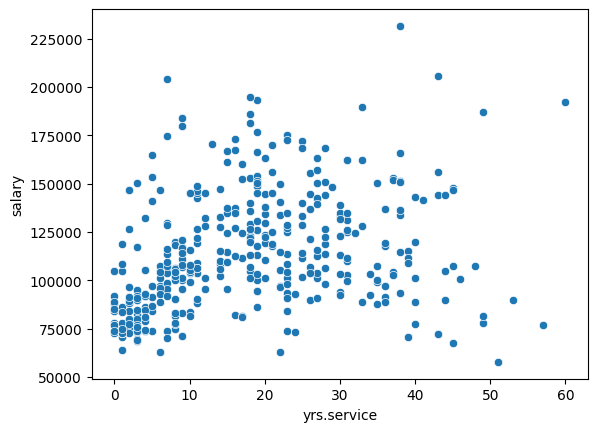

In [23]:
sns.scatterplot(x = "yrs.service", y = "salary", data = df)


There is a positive and negative correlation, as yrs increases the salary increases between 3-10 yrs.

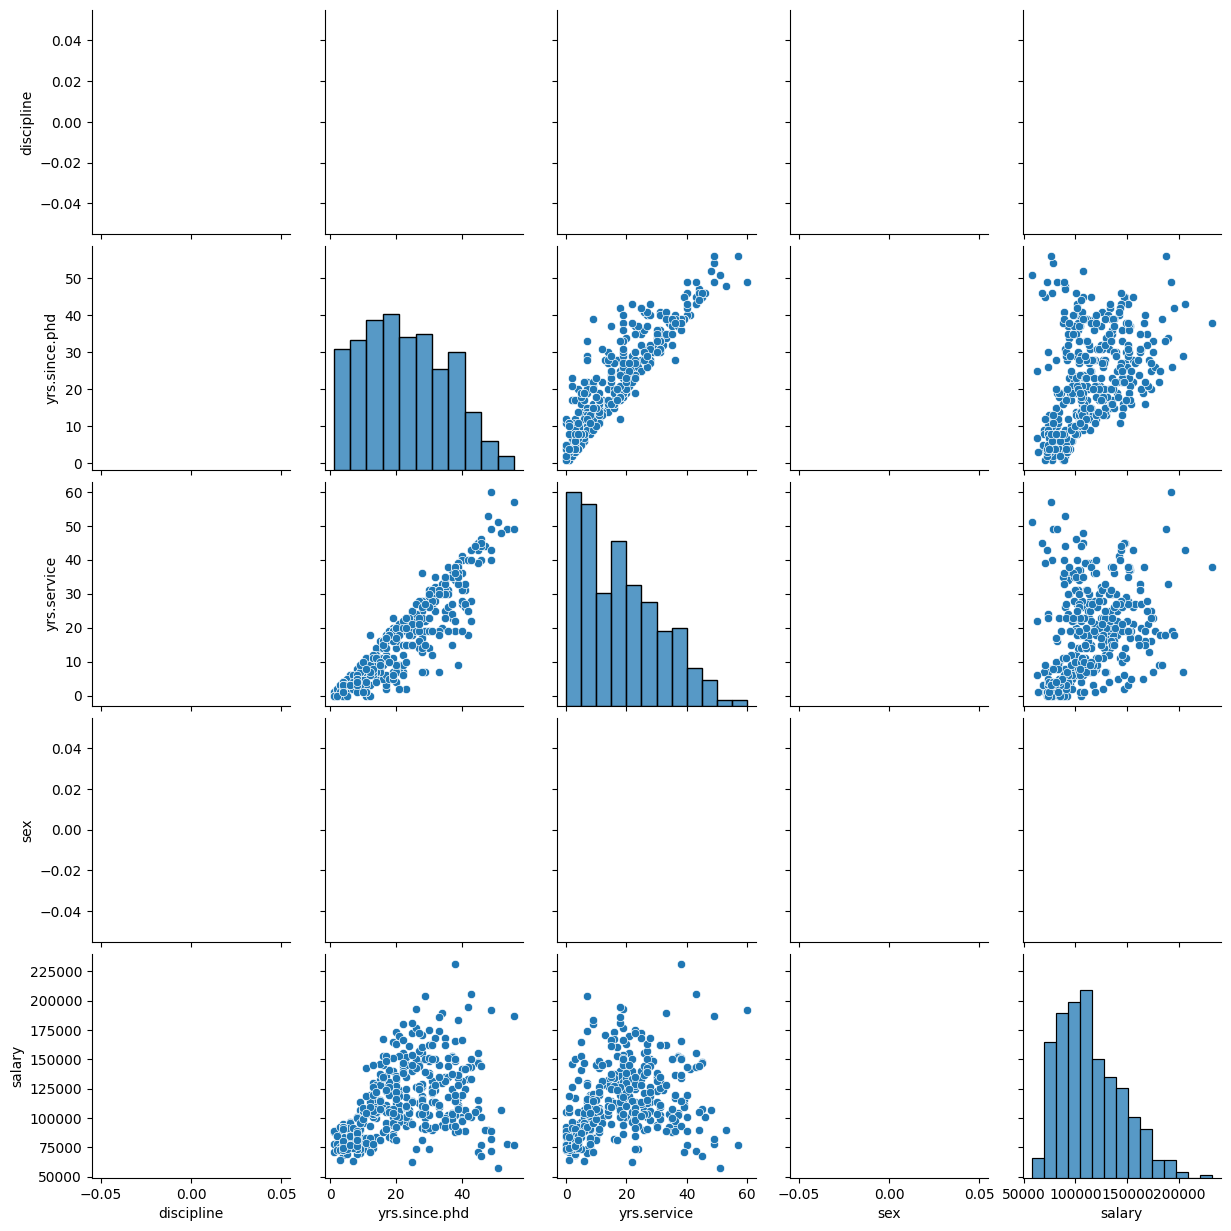

In [24]:
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.savefig('pairplot.png')
plt.show()

In [25]:
df.corr()

,discipline,yrs.since.phd,yrs.service,sex,salary
discipline,NaN,NaN,NaN,NaN,NaN
yrs.since.phd,NaN,1.000000,0.909649,NaN,0.419231
yrs.service,NaN,0.909649,1.000000,NaN,0.334745
sex,NaN,NaN,NaN,NaN,NaN
salary,NaN,0.419231,0.334745,NaN,1.000000


<AxesSubplot:>

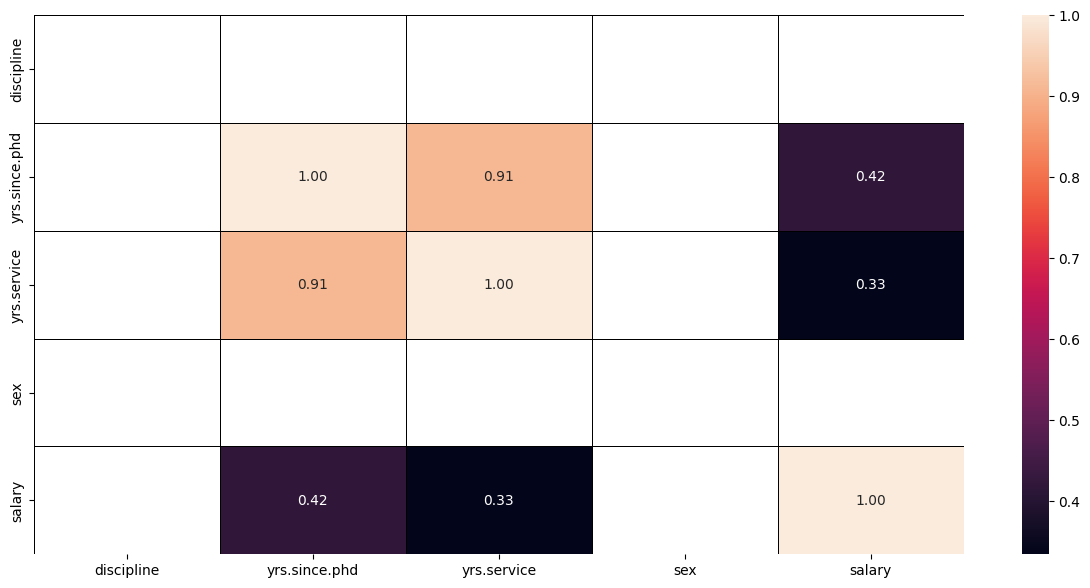

In [26]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot= True, linewidths= 0.5, linecolor= "black", fmt= '.2f')

In [27]:
df.corr()['salary'].sort_values()

yrs.service      0.334745
yrs.since.phd    0.419231
salary           1.000000
discipline            NaN
sex                   NaN
Name: salary, dtype: float64

least correlated is yrs.service and the most correlated is yrs.since.phd

In [28]:
df.describe()

,discipline,yrs.since.phd,yrs.service,sex,salary
count,0.0,397.000000,397.000000,0.0,397.000000
mean,NaN,22.314861,17.614610,NaN,113706.458438
std,NaN,12.887003,13.006024,NaN,30289.038695
min,NaN,1.000000,0.000000,NaN,57800.000000
25%,NaN,12.000000,7.000000,NaN,91000.000000
50%,NaN,21.000000,16.000000,NaN,107300.000000
75%,NaN,32.000000,27.000000,NaN,134185.000000
max,NaN,56.000000,60.000000,NaN,231545.000000


<function matplotlib.pyplot.show(close=None, block=None)>

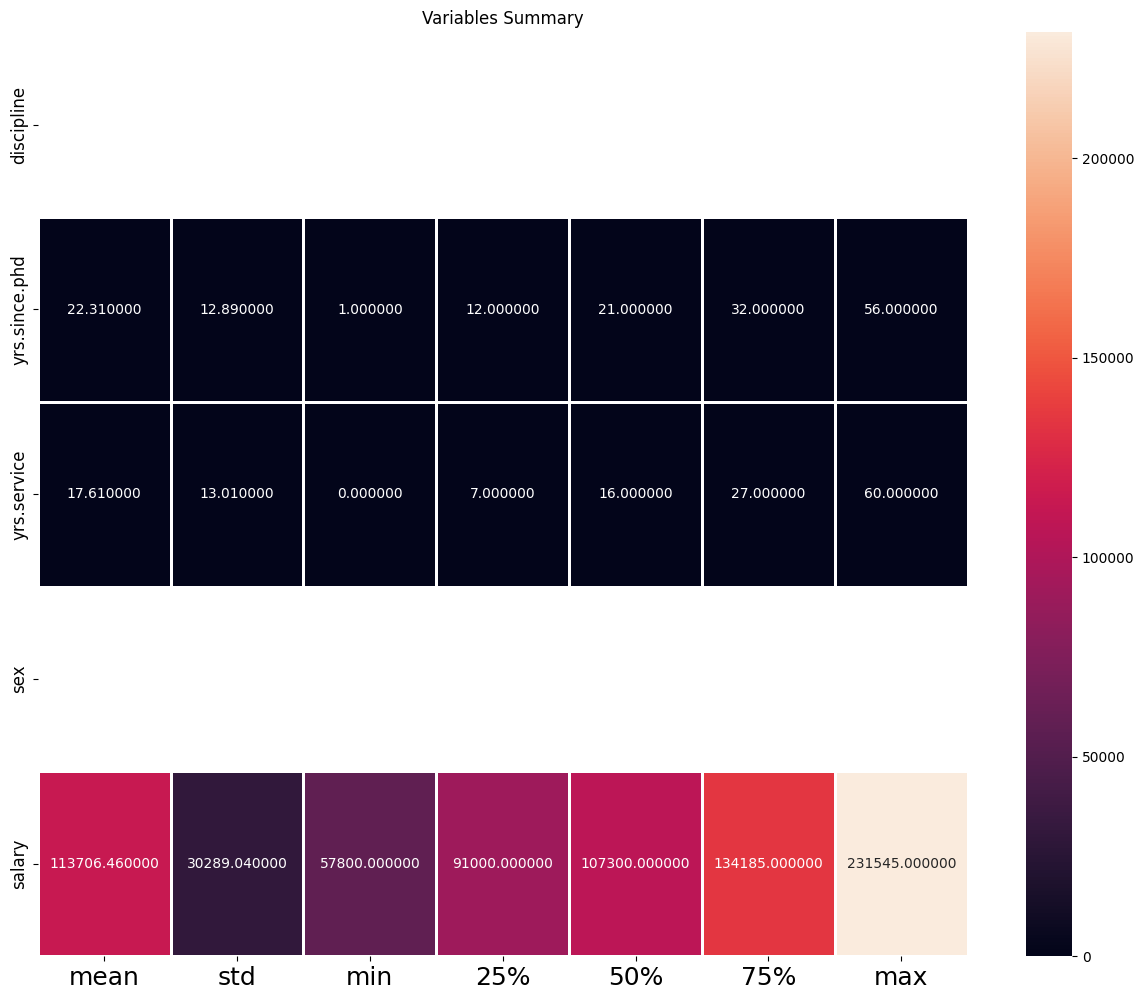

In [29]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(), 2), linewidth = 2, annot= True, fmt= "f")
plt.xticks(fontsize=18)
plt.yticks(fontsize =12)
plt.title("Variables Summary")
plt.savefig("heatmap.png")
plt.show

Total number of rows in the datasets:
1. 397 rows 
2. 6 columns

yrs.since.phd	

1. Mean = 22.314861		
2. Std = 12.887003		
3. max_value = 56.000000		
4. min_value = 1.000000		

yrs.service	

1. Mean = 17.614610
2. Std = 13.006024
3. max_value = 60.000000
4. min_value = 0.000000

salary

1. Mean = 113706.458438
2. Std = 30289.038695
3. max_value = 231545.000000
4. min_value = 57800.000000

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rank           397 non-null    object 
 1   discipline     0 non-null      float64
 2   yrs.since.phd  397 non-null    int64  
 3   yrs.service    397 non-null    int64  
 4   sex            0 non-null      float64
 5   salary         397 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 18.7+ KB


Outliers Checking:

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
collist = df.columns.values
ncol = 30
nrows = 14

In [33]:
collist

array(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex',
       'salary'], dtype=object)

In [34]:
len(list(range(0,len(collist))))

6

In [35]:
type(collist)

numpy.ndarray

In [36]:
for i in range(0,len(collist)):
    print(collist[i])
    break 

rank


In [37]:
df[collist[0]]

0          Prof
1          Prof
2      AsstProf
3          Prof
4          Prof
         ...   
392        Prof
393        Prof
394        Prof
395        Prof
396    AsstProf
Name: rank, Length: 397, dtype: object

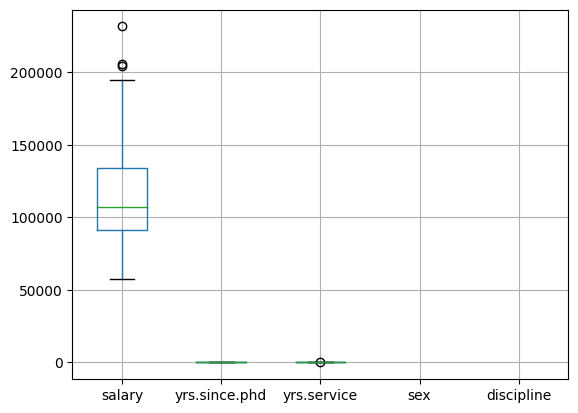

In [38]:
boxplot = df.boxplot(column=['salary', 'yrs.since.phd', 'yrs.service', 'sex', 'discipline']) 				

Skewness

In [39]:
df.skew()

discipline            NaN
yrs.since.phd    0.300880
yrs.service      0.650569
sex                   NaN
salary           0.714568
dtype: float64

Normal Distribution Curve

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

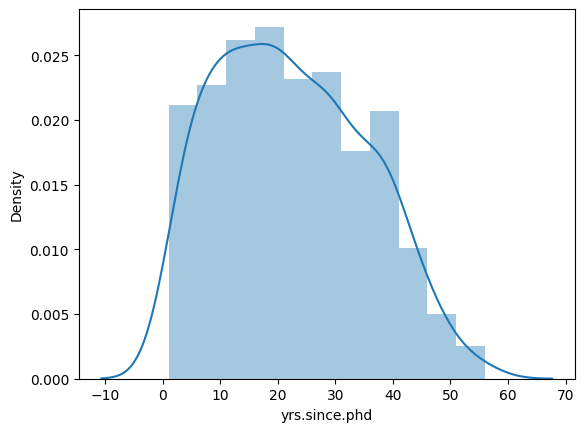

In [40]:
sns.distplot(df["yrs.since.phd"]) 		

The data is not normalised. The building blocks is out of the normalised curve

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

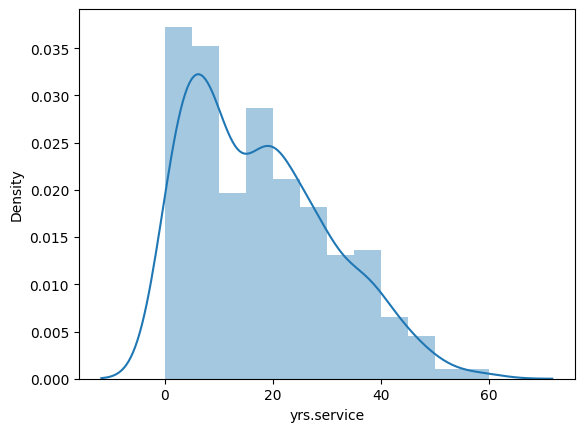

In [41]:
sns.distplot(df["yrs.service"])

The data is not normalised. The building blocks is out of the normalised curve

<AxesSubplot:xlabel='salary', ylabel='Density'>

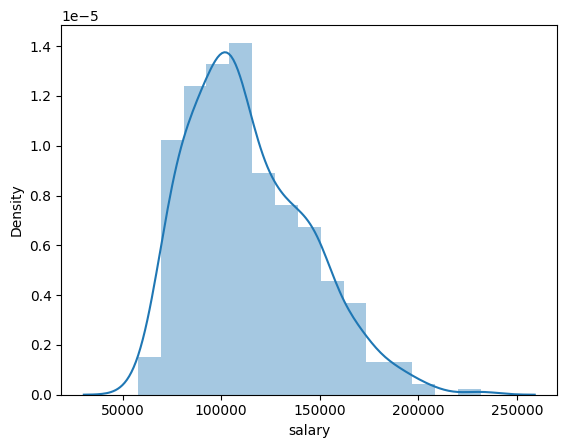

In [42]:
sns.distplot(df["salary"])

The data is not normalised. The building blocks is out of the normalised curve

The normal distribution curve of salary is irrelevant

The normal distribution shows that the data is skewed

Data Cleaning

In [43]:
df.corr()['salary'].sort_values()

yrs.service      0.334745
yrs.since.phd    0.419231
salary           1.000000
discipline            NaN
sex                   NaN
Name: salary, dtype: float64

In [52]:
delete = pd.DataFrame.column =['sex', 'discipline', 'rank']

In [53]:
delete

['sex', 'discipline', 'rank']

In [56]:
df = df.drop(["sex", "rank", "discipline"], axis=1)

In [57]:
df

,yrs.since.phd,yrs.service,salary
0,19,18,139750
1,20,16,173200
2,4,3,79750
3,45,39,115000
4,40,41,141500
...,...,...,...
392,33,30,103106
393,31,19,150564
394,42,25,101738
395,25,15,95329


In [58]:
df.iloc[:, :-1].values

array([[19, 18],
       [20, 16],
       [ 4,  3],
       [45, 39],
       [40, 41],
       [ 6,  6],
       [30, 23],
       [45, 45],
       [21, 20],
       [18, 18],
       [12,  8],
       [ 7,  2],
       [ 1,  1],
       [ 2,  0],
       [20, 18],
       [12,  3],
       [19, 20],
       [38, 34],
       [37, 23],
       [39, 36],
       [31, 26],
       [36, 31],
       [34, 30],
       [24, 19],
       [13,  8],
       [21,  8],
       [35, 23],
       [ 5,  3],
       [11,  0],
       [12,  8],
       [20,  4],
       [ 7,  2],
       [13,  9],
       [ 4,  2],
       [ 4,  2],
       [ 5,  0],
       [22, 21],
       [ 7,  4],
       [41, 31],
       [ 9,  9],
       [23,  2],
       [23, 23],
       [40, 27],
       [38, 38],
       [19, 19],
       [25, 15],
       [40, 28],
       [23, 19],
       [25, 25],
       [ 1,  1],
       [28, 28],
       [12, 11],
       [11,  3],
       [16,  9],
       [12, 11],
       [14,  5],
       [23, 21],
       [ 9,  8],
       [10,  9

In [59]:
df.iloc[:, 1].values

array([18, 16,  3, 39, 41,  6, 23, 45, 20, 18,  8,  2,  1,  0, 18,  3, 20,
       34, 23, 36, 26, 31, 30, 19,  8,  8, 23,  3,  0,  8,  4,  2,  9,  2,
        2,  0, 21,  4, 31,  9,  2, 23, 27, 38, 19, 15, 28, 19, 25,  1, 28,
       11,  3,  9, 11,  5, 21,  8,  9,  3,  8,  2, 31, 11,  3,  8, 12, 31,
       17, 36,  2, 45, 19, 34, 23,  3,  3, 19,  1,  2, 28, 16, 20,  2, 18,
       14, 37,  2, 25,  7,  5,  7,  7, 38, 20,  0, 12,  7, 14, 26, 25, 23,
        5, 14, 10, 28,  8,  8,  8, 31, 16, 16,  1, 37,  0,  9, 29, 36,  1,
        3, 14, 32, 22, 22, 22, 49, 26,  0, 30,  2,  9, 57,  8,  1, 25, 18,
       14, 14,  7, 18,  8, 10, 11,  3, 27, 28,  4, 27, 26,  3, 12,  4,  9,
       10,  0, 21, 18,  0,  6, 16,  2, 19,  7,  3,  0,  8, 16, 19,  6, 18,
        5, 19, 24, 20,  6, 25,  7,  9, 14,  3, 11,  5,  8, 22, 23, 30, 10,
       10, 28, 19,  9, 22, 18, 19, 53,  7,  4,  4, 33, 22,  4, 40, 17, 17,
        5,  2, 33, 18,  2, 20,  3, 39,  7, 19,  1, 11, 11, 22,  7, 11, 21,
       10,  6, 20, 35, 20

In [60]:

x = df.iloc[:, :-1].values
y = df.iloc[:,1].values

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

In [76]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [81]:
# Step 4: Make Prediction
y_pred = regressor.predict(X_test)

In [87]:
len(y_pred)

133

In [88]:
len(X_train)

264

In [89]:
len(y_train)

264

In [90]:
len(X_test)

133

In [91]:
len(y_test)

133

In [83]:
y_test

array([ 8,  8, 23,  1,  4, 11,  1,  8,  1, 15, 18,  9, 25,  3, 10, 20, 19,
       10, 18,  8, 27,  0,  4,  3,  9,  6, 11, 30, 17, 25, 30, 15,  0, 11,
        7,  5, 25, 35, 16,  5, 23, 16, 36, 23, 14, 22, 38, 15, 37, 11,  6,
       10, 20,  3,  8, 23, 15, 19, 53, 41, 22,  3,  8,  3,  8, 16,  6, 10,
       11, 45,  5, 17, 26, 33, 18, 44,  3, 28,  0, 22,  3,  5,  9,  5, 45,
       60,  8, 33,  4,  3, 21, 20,  7, 27, 15, 30, 20,  4, 18, 11,  2, 11,
       27, 16, 27, 39, 43, 12,  7, 13, 31, 10, 24, 30,  1, 17, 43,  7, 21,
       20, 38,  3,  8, 30,  7, 21,  6, 19, 21, 19, 12,  4, 28])

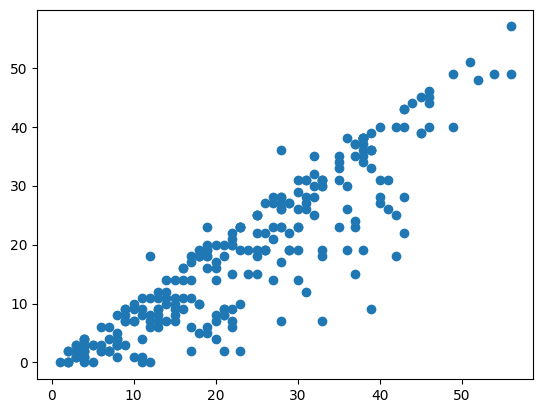

In [99]:
plt.scatter(X_train[:,0], y_train)

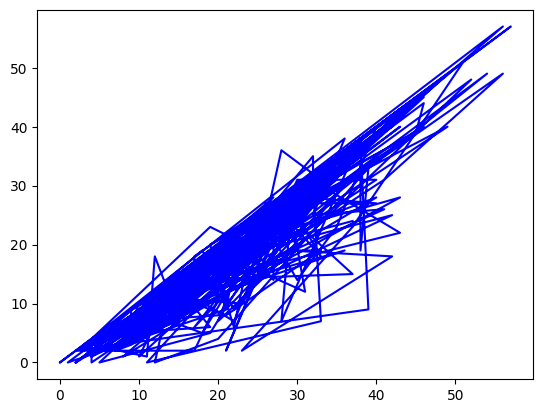

In [94]:
plt.plot(X_train, regressor.predict(X_train), color='blue')

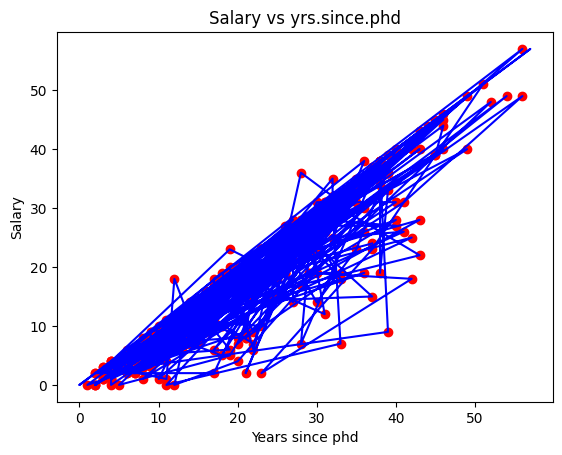

In [98]:

# plot the actual data points of training set
plt.scatter(X_train[:,0], y_train, color = 'red')
# plot the regression line
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs yrs.since.phd')
plt.xlabel('Years since phd')
plt.ylabel('Salary')
plt.show()

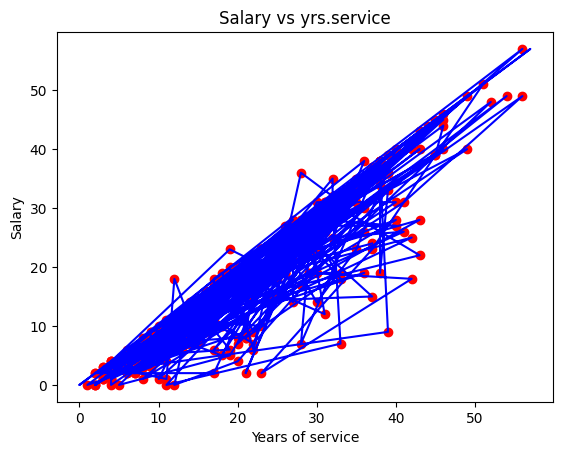

In [100]:

# plot the actual data points of training set
plt.scatter(X_train[:,0], y_train, color = 'red')
# plot the regression line
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs yrs.service')
plt.xlabel('Years of service')
plt.ylabel('Salary')
plt.show()